# Data in columns

In [1]:
import quasardb
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_size=10
print(quasardb.version()) 
c = quasardb.Cluster("qdb://qdb-server:2836")

3.4.1


<b>Create a column in table with a double type</b>

In [3]:
#create table for this sample
table = c.ts("ts_colum1_1")
columns = [quasardb.ColumnInfo(quasardb.ColumnType.Double, "close")]
table.create(columns)

#create timestamps to associate to timeseries
timestamps = np.array('2019-03-14', dtype=np.datetime64)+ np.arange(sample_size)

# Generate random doubles of timeserie
double_values = np.random.uniform(-100.0, 100.0, sample_size)
# Insert the double timeserie
table.double_insert("close", timestamps.astype('datetime64[ns]'), double_values)

<b>retrieving entire column using a query</b>

In [4]:
q = c.query("select * from ts_colum1_1 ")
res = q.run()

for col in res.tables["ts_colum1_1"]:
    # col.name is a string for the name of the column
    # col.data is a numpy array of the proper type
    assert sample_size== len(col.data)
    print(col.name, ": ", col.data)

$timestamp :  ['2019-03-14T00:00:00.000000000' '2019-03-15T00:00:00.000000000'
 '2019-03-16T00:00:00.000000000' '2019-03-17T00:00:00.000000000'
 '2019-03-18T00:00:00.000000000' '2019-03-19T00:00:00.000000000'
 '2019-03-20T00:00:00.000000000' '2019-03-21T00:00:00.000000000'
 '2019-03-22T00:00:00.000000000' '2019-03-23T00:00:00.000000000']
close :  [ 90.15535641   8.94164689  54.02444463 -97.85351106 -49.1794477
 -93.90486333 -11.52845228  32.57131537 -66.26536651  43.60483398]


<b>retriving entire column using native python</b>

In [5]:
points = table.double_get_ranges("close")
query_timestamps = points[0]
query_values = points[1]
assert len(query_timestamps) == len(query_values)
assert len(query_timestamps) == sample_size
print("returning %d items"  % len(query_timestamps))

returning 10 items


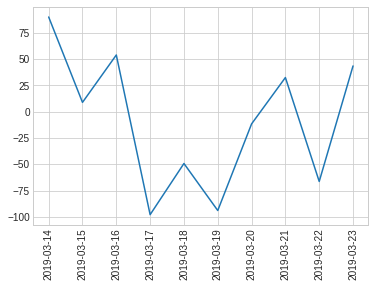

In [6]:
plt.style.use('seaborn-whitegrid')
plt.plot(query_timestamps, query_values)
plt.xticks(rotation=90)
plt.show()

<b>Retrieve a range of 2 days </b>

In [7]:
points = table.double_get_ranges("close", [(np.datetime64('2019-03-14', 'ns'),
                                        np.datetime64('2019-03-16', 'ns'))])
query_timestamps = points[0]
query_values = points[1]
assert len(query_timestamps) == len(query_values)
assert len(query_timestamps) == 2
print(query_timestamps,query_values)


['2019-03-14T00:00:00.000000000' '2019-03-15T00:00:00.000000000'] [90.15535641  8.94164689]


<b>Retrieve multiple time ranges column<b>

In [8]:
points = table.double_get_ranges("close", [(np.datetime64('2019-03-14', 'ns'),
                                        np.datetime64('2019-03-16', 'ns')),
                                           (np.datetime64('2019-03-18', 'ns'),
                                        np.datetime64('2019-03-20', 'ns'))
                                       ])

query_timestamps = points[0]
query_values = points[1]
assert len(query_timestamps) == len(query_values)
assert len(query_timestamps) == 4
print(query_timestamps,query_values)

['2019-03-14T00:00:00.000000000' '2019-03-15T00:00:00.000000000'
 '2019-03-18T00:00:00.000000000' '2019-03-19T00:00:00.000000000'] [ 90.15535641   8.94164689 -49.1794477  -93.90486333]


<b>Retrieving column content using iterator<br>
If the table is very large ( several millions of lines ) this method streams <br> avoiding memory overflows on your client</b>

In [9]:
for row in table.reader(dict=True):
    print(row['close'])

90.15535640906444
8.941646890962403
54.02444462796933
-97.85351105605326
-49.179447699977665
-93.90486333497057
-11.528452276180161
32.57131537259701
-66.26536650590108
43.60483397936136


In [10]:
assert table.column_type_by_id('close')== quasardb.quasardb.ColumnType.Double

In [11]:
#tearing down data for this sample
table = c.ts("ts_colum1_1")
table.remove()